In [3]:
#IMPORTING RELEVANT LIBRARIES
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()

DATA SET CAN BE FOUND AT KAGGLE 
https://www.kaggle.com/datasets/mathsian/hotel-bookings?select=hotel_bookings.csv

In [4]:
#LOADING RAW DATA
raw_data = pd.read_csv('hotel_bookings.csv')

raw_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [5]:
raw_data.shape

(14684, 32)

In [6]:
raw_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
#PRE PROCESSING STARTS FROM HERE !

In [8]:
#SOME DISCRIPTIVE STATS
raw_data.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,14684,14684.000000,14684.000000,14684.000000,14684,14684.000000,14684.000000,14684.000000,14684.000000,14683.000000,...,14683,12172.000000,1005.000000,14683.000000,14683,14683.000000,14683.000000,14683.000000,14683,14683
unique,1,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,866
top,Resort Hotel,NaN,NaN,NaN,July,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Canceled,2016-04-04
freq,14684,NaN,NaN,NaN,2087,NaN,NaN,NaN,NaN,NaN,...,13295,NaN,NaN,NaN,11630,NaN,NaN,NaN,9913,75
mean,NaN,0.692863,117.094593,2016.023154,NaN,28.428766,15.852969,1.292291,3.409153,1.913574,...,NaN,222.486773,219.241791,1.017367,NaN,101.136610,0.054485,0.537833,NaN,NaN
std,NaN,0.461322,100.774470,0.746767,NaN,12.894383,8.953989,1.182850,2.537330,0.977172,...,NaN,82.943935,111.503739,10.283207,NaN,62.574492,0.228475,0.784059,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,9.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,34.000000,2015.000000,NaN,18.000000,8.000000,0.000000,2.000000,2.000000,...,NaN,240.000000,135.000000,0.000000,NaN,55.000000,0.000000,0.000000,NaN,NaN
50%,NaN,1.000000,93.000000,2016.000000,NaN,29.000000,16.000000,1.000000,3.000000,2.000000,...,NaN,240.000000,223.000000,0.000000,NaN,81.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,179.000000,2017.000000,NaN,38.000000,24.000000,2.000000,5.000000,2.000000,...,NaN,241.000000,281.000000,0.000000,NaN,135.000000,0.000000,1.000000,NaN,NaN


In [9]:
raw_data['is_canceled']

0        0
1        0
2        0
3        0
4        0
        ..
14679    0
14680    1
14681    1
14682    1
14683    1
Name: is_canceled, Length: 14684, dtype: int64

In [10]:
#BUSINESS CASE:
#I AM TAKING 'is_canceled' AS A TARGET COLUMN AND CLASSIFY IF A CUSTOMER WILL CANCEL HIS BOOKED ROOM OR NOT BASED ON THE GIVEN DATA.
#THIS WILL HELP COMPANY TO ALLOCATE THE ROOMS EFFECTIVELY.

In [11]:
raw_data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                1
children                              1
babies                                1
meal                                  1
country                             438
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                              2512
company                           13679


In [12]:
print(f'Null values Percentages: \nchildren:\t\t {(4/119390)*100}\ncountry:\t\t {(488/119390)*100}\nagent:\t\t\t {(16340/119390)*100}\ncompany:\t\t {(112593/119390)*100}')

Null values Percentages: 
children:		 0.003350364352123293
country:		 0.40874445095904177
agent:			 13.686238378423655
company:		 94.30689337465449


In [13]:
data = raw_data.drop('company', axis= 1)
data = data[data['country'].notna()]
data = data[data['children'].notna()]
data['agent'] = data['agent'].fillna(data['agent'].mode()[0])
data.reset_index()
data.shape

(14246, 31)

In [14]:
data.corr().iloc[1:,0]

lead_time                         0.047314
arrival_date_year                 0.486150
arrival_date_week_number         -0.175858
arrival_date_day_of_month        -0.003009
stays_in_weekend_nights           0.055074
stays_in_week_nights              0.015192
adults                            0.058730
children                          0.102893
babies                           -0.018129
is_repeated_guest                -0.005540
previous_cancellations           -0.075427
previous_bookings_not_canceled   -0.139271
booking_changes                  -0.155175
agent                             0.057473
days_in_waiting_list             -0.142547
adr                               0.173961
required_car_parking_spaces      -0.354850
total_of_special_requests        -0.066383
Name: is_canceled, dtype: float64

In [15]:
data.drop(['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'agent', 'adults', 'children', 'babies',
           'adr'], axis= 1, inplace= True)

In [16]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [17]:
data['customer_type'].value_counts()

Transient          11225
Transient-Party     2569
Contract             409
Group                 43
Name: customer_type, dtype: int64

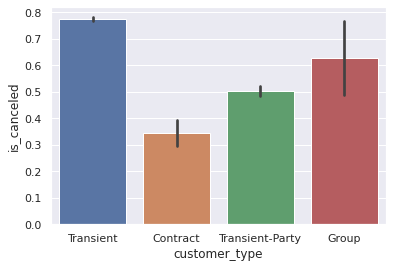

In [18]:
sns.barplot(data= data, x='customer_type', y= 'is_canceled') #IMPORTANT FEATURE

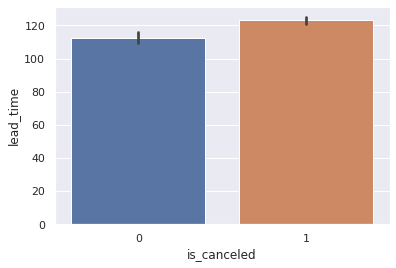

In [19]:
sns.barplot(data = data, x= 'is_canceled', y='lead_time') #IMPORTANT FEATURE

In [20]:
data['arrival_date_month'].value_counts()

July         2055
August       1976
October      1464
May          1322
April        1295
September    1256
June         1152
March         955
February      839
December      815
November      745
January       372
Name: arrival_date_month, dtype: int64

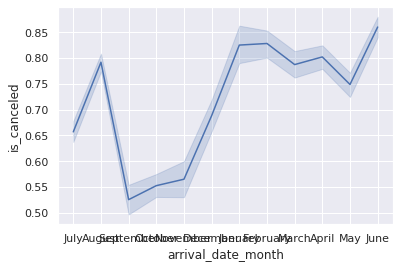

In [21]:
sns.lineplot(data= data, x= 'arrival_date_month', y='is_canceled')    #IMPORTANT FEATURE

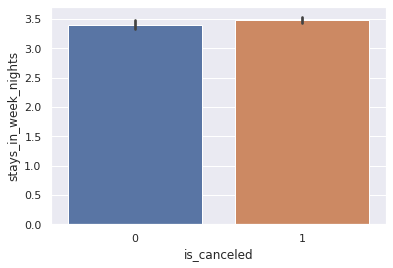

In [22]:
sns.barplot(data= data, x= 'is_canceled',y="stays_in_week_nights")  #USELES FEATURE

In [23]:
data.drop('stays_in_week_nights', axis=1, inplace= True)

In [24]:
data['meal'].value_counts()

BB           10175
HB            3183
FB             464
Undefined      401
SC              23
Name: meal, dtype: int64

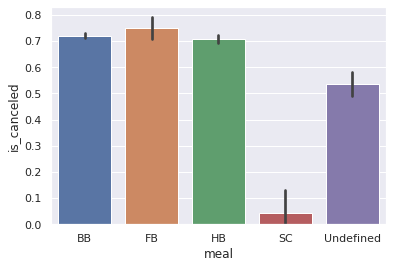

In [25]:
sns.barplot(data= data, x= 'meal', y='is_canceled')   #IMPORTANT FEATURE

In [26]:
data.country.value_counts() #USELESS FEATURE

PRT    8220
GBR    1727
ESP    1331
IRL     614
DEU     414
       ... 
ZWE       1
CAF       1
TUN       1
JAM       1
BHR       1
Name: country, Length: 86, dtype: int64

In [27]:
data.drop('country', axis=1, inplace= True)   #IMPORTANT FEATURE

In [28]:
data['market_segment'].value_counts()

Online TA        7314
Groups           2903
Offline TA/TO    1907
Direct           1425
Corporate         654
Complementary      43
Name: market_segment, dtype: int64

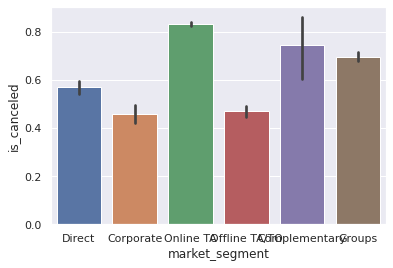

In [29]:
sns.barplot(data= data, x= 'market_segment', y='is_canceled')   #IMPORTANT FEATURE

In [30]:
data['distribution_channel'].value_counts() #USELESS FEATURE

TA/TO        11099
Direct        2212
Corporate      934
Undefined        1
Name: distribution_channel, dtype: int64

In [31]:
data.drop('distribution_channel', axis=1, inplace= True)

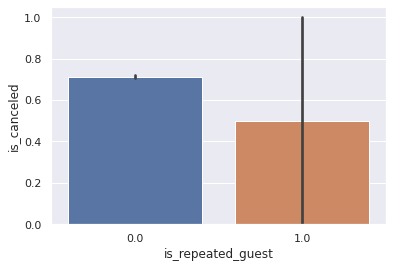

In [32]:
sns.barplot(data= data, x= 'is_repeated_guest', y='is_canceled')   #IMPORTANT FEATURE

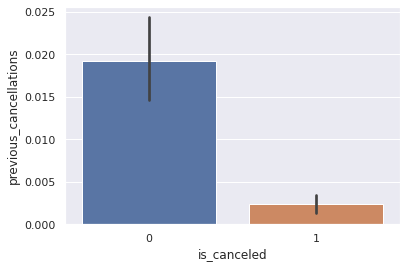

In [33]:
sns.barplot(data= data, x= 'is_canceled', y='previous_cancellations')   #IMPORTANT FEATURE

In [34]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'meal',
       'market_segment', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [35]:
data.reserved_room_type.value_counts()  #USELESS DATA

A    8250
D    2533
E    1812
G     735
C     373
H     273
F     265
L       5
Name: reserved_room_type, dtype: int64

In [36]:
data.drop('reserved_room_type', axis=1, inplace= True)

In [37]:
data.drop('assigned_room_type', axis=1, inplace= True)

In [38]:
data.deposit_type.value_counts()  #USELESS FEATURE

No Deposit    12858
Non Refund     1304
Refundable       84
Name: deposit_type, dtype: int64

In [39]:
data.drop('deposit_type', axis=1, inplace= True)

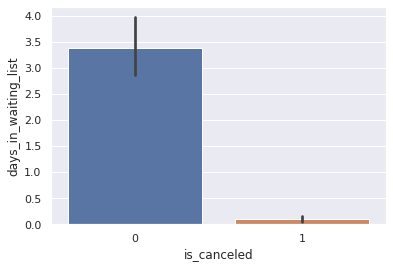

In [40]:
sns.barplot(data = data, y= 'days_in_waiting_list', x= 'is_canceled')   #IMPORTANT FEATURE

In [41]:
data.customer_type.value_counts()   

Transient          11225
Transient-Party     2569
Contract             409
Group                 43
Name: customer_type, dtype: int64

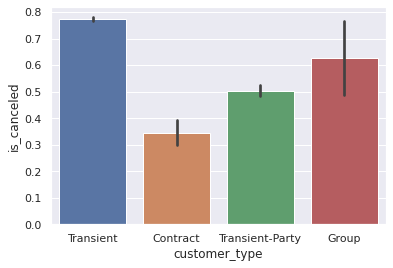

In [42]:
sns.barplot(data = data, x= 'customer_type', y= 'is_canceled')    #IMPORTANT FEATURE

In [43]:
data.reservation_status.value_counts()    #WE DONT NEED THIS

Canceled     9884
Check-Out    4106
No-Show       256
Name: reservation_status, dtype: int64

In [44]:
data.drop(['reservation_status', 'reservation_status_date'], axis = 1, inplace = True)

In [45]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'meal',
       'market_segment', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [46]:
data.shape

(14246, 14)

In [47]:
data_preprocessed = data

In [48]:
#DONE PREPROCESSING
#MODEL CREATION STARTS HERE

In [49]:
data_preprocessed.head()

,hotel,is_canceled,lead_time,arrival_date_month,meal,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,BB,Direct,0.0,0.0,0.0,3.0,0.0,Transient,0.0,0.0
1,Resort Hotel,0,737,July,BB,Direct,0.0,0.0,0.0,4.0,0.0,Transient,0.0,0.0
2,Resort Hotel,0,7,July,BB,Direct,0.0,0.0,0.0,0.0,0.0,Transient,0.0,0.0
3,Resort Hotel,0,13,July,BB,Corporate,0.0,0.0,0.0,0.0,0.0,Transient,0.0,0.0
4,Resort Hotel,0,14,July,BB,Online TA,0.0,0.0,0.0,0.0,0.0,Transient,0.0,1.0


In [50]:
#model uses only numereical data so converting categorical elements to unique numerical IDs
data_preprocessed['hotel'],_ = pd.factorize(data_preprocessed['hotel'])
data_preprocessed['arrival_date_month'],_ = pd.factorize(data_preprocessed['arrival_date_month'])
data_preprocessed['meal'],_ = pd.factorize(data_preprocessed['meal'])
data_preprocessed['market_segment'],_ = pd.factorize(data_preprocessed['market_segment'])
data_preprocessed['customer_type'],_ = pd.factorize(data_preprocessed['customer_type'])

In [51]:
data_preprocessed.head()

,hotel,is_canceled,lead_time,arrival_date_month,meal,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,0,342,0,0,0,0.0,0.0,0.0,3.0,0.0,0,0.0,0.0
1,0,0,737,0,0,0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0
2,0,0,7,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0,0,13,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,0,0,14,0,0,2,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0


In [52]:
#now it's numbers everywhere, and computers are good at numbers

In [53]:
#CREATING MACHINE LEARNING MODEL

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
y = data_preprocessed['is_canceled']
X = data_preprocessed.drop('is_canceled', axis = 1)

In [56]:
#MODEL TRAINING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train_scaled = StandardScaler().fit(X_train)

In [57]:
sigmoid = LogisticRegression()

sigmoid.fit(X_train, y_train)

y_predict_s = sigmoid.predict(X_test)

accuracy_score(y_predict_s, y_test)

#RECEIVED 77.9 % ACCURACY WITH LOGISTIC REGRESSION ML MODEL

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7785964912280702

In [67]:
tree = DecisionTreeClassifier(max_leaf_nodes=600)

tree.fit(X_train, y_train)

y_predict_t = tree.predict(X_test)

accuracy_score(y_predict_t, y_test)

#RECEIVED 85.9 % ACCURACY WITH DECISION TREE ML MODEL  

0.8589473684210527

In [59]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

y_predict_f = forest.predict(X_test)

accuracy_score(y_predict_f, y_test)

#RECEIVED 85.7 % ACCURACY WITH RANDOM FOREST ML MODEL

0.8571929824561404

In [73]:
KNN = KNeighborsClassifier(leaf_size= 30)

KNN.fit(X_train, y_train)

y_predict_K = KNN.predict(X_test)

accuracy_score(y_predict_K, y_test)

#RECEIVED 81.4 % ACCURACY WITH KNN ML MODEL

0.8140350877192982